# Figure comparing weights, pressures and star formation rate surface densities for Figure 13 in Jeffreson et al. 2024b

In [1]:
import numpy as np
from scipy.stats import binned_statistic_2d

import sys, glob, re

sys.path.append('../')
import astro_helper as ah
import PRFM_helper as ph

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches
from matplotlib import rc
from matplotlib.ticker import LogLocator
from matplotlib.lines import Line2D
from matplotlib.colors import LogNorm
rc('axes', linewidth=1.5)
rc('axes', edgecolor='#3C3C3C')
plt.style.use('mpl_style_Jeffreson.mplstyle')

# Load the data

In [2]:
titles = ['Milky Way-like', 'ETG, vlM', 'ETG, lowM', 'ETG, medM', 'ETG, hiM']

## PRFM, unresolved

In [3]:
# PRFM, unresolved files
dirs_prfm = [
    '/LtU/LOW-PRFM/',
    '/LOW-ETGs/vlM-PRFM/',
    '/LOW-ETGs/lowM-PRFM/',
    '/LOW-ETGs/medM-PRFM/',
    '/LOW-ETGs/hiM-PRFM/'
]
files_prfm = []
for dir_prfm in dirs_prfm:
    files = glob.glob('/n/holystore01/LABS/itc_lab/Users/sjeffreson/'+dir_prfm+'/output/snap_*.hdf5')
    files = [x for _, x in sorted(zip([int(re.search(r'\d+', x).group()) for x in files], files))]
    files = files[5:]
    files_prfm.append(files)

In [4]:
tau_deps_prfm, SFRs_prfm = [], []
for files, title in zip(files_prfm, titles):
    print(title)
    tau_deps, SFRs = ph.collect_tau_deps(files)
    tau_deps_prfm.append(tau_deps)
    SFRs_prfm.append(SFRs)

Milky Way-like
ETG, vlM
ETG, lowM
ETG, medM
ETG, hiM


In [5]:
tau_dyns_prfm = []
for files, title in zip(files_prfm, titles):
    print(title)
    tau_dyns = ph.collect_tau_dyns_prfm(files)
    tau_dyns_prfm.append(tau_dyns)

Milky Way-like
ETG, vlM
ETG, lowM
ETG, medM
ETG, hiM


## PRFM, resolved

In [6]:
# PRFM, resolved files
dirs_prfm_res = [
    '/LtU/LOW-PRFM_RSLVD/',
    '/LOW-ETGs/vlM-PRFM-res/',
    '/LOW-ETGs/lowM-PRFM-res/',
    '/LOW-ETGs/medM-PRFM-res/',
    '/LOW-ETGs/hiM-PRFM-res/'
]
files_prfm_res = []
for dir_prfm_res in dirs_prfm_res:
    files = glob.glob('/n/holystore01/LABS/itc_lab/Users/sjeffreson/'+dir_prfm_res+'/output/snap_*.hdf5')
    files = [x for _, x in sorted(zip([int(re.search(r'\d+', x).group()) for x in files], files))]
    files = files[5:]
    files_prfm_res.append(files)

In [7]:
tau_deps_prfm_res, SFRs_prfm_res = [], []
for files, title in zip(files_prfm_res, titles):
    print(title)
    tau_deps, SFRs = ph.collect_tau_deps(files)
    tau_deps_prfm_res.append(tau_deps)
    SFRs_prfm_res.append(SFRs)

Milky Way-like
ETG, vlM
ETG, lowM
ETG, medM
ETG, hiM


In [8]:
tau_dyns_prfm_res = []
for files, title in zip(files_prfm_res, titles):
    print(title)
    tau_dyns = ph.collect_tau_dyns_prfm(files)
    tau_dyns_prfm_res.append(tau_dyns)

Milky Way-like
ETG, vlM
ETG, lowM
ETG, medM
ETG, hiM


## Springel & Hernquist 03

In [9]:
# SH03 files
dirs_SH03 = [
    '/LtU/LOW-SH03/',
    '/LOW-ETGs/vlM/',
    '/LOW-ETGs/lowM/',
    '/LOW-ETGs/medM/',
    '/LOW-ETGs/hiM/'
]
files_SH03 = []
for dir_SH03 in dirs_SH03:
    files = glob.glob('/n/holystore01/LABS/itc_lab/Users/sjeffreson/'+dir_SH03+'/output/snap_*.hdf5')
    files = [x for _, x in sorted(zip([int(re.search(r'\d+', x).group()) for x in files], files))]
    files = files[5:]
    files_SH03.append(files)

In [10]:
tau_deps_SH03, SFRs_SH03 = [], []
for files, title in zip(files_SH03, titles):
    print(title)
    tau_deps, SFRs = ph.collect_tau_deps(files)
    tau_deps_SH03.append(tau_deps)
    SFRs_SH03.append(SFRs)

Milky Way-like
ETG, vlM
ETG, lowM
ETG, medM
ETG, hiM


In [13]:
tau_dyns_SH03 = []
for files, title in zip(files_SH03, titles):
    print(title)
    tau_dyns = ph.collect_tau_dyns(files, mode='SH03')
    tau_dyns_SH03.append(tau_dyns)

Milky Way-like
ETG, vlM
ETG, lowM
ETG, medM
ETG, hiM


## high-resolution galaxies

# figure

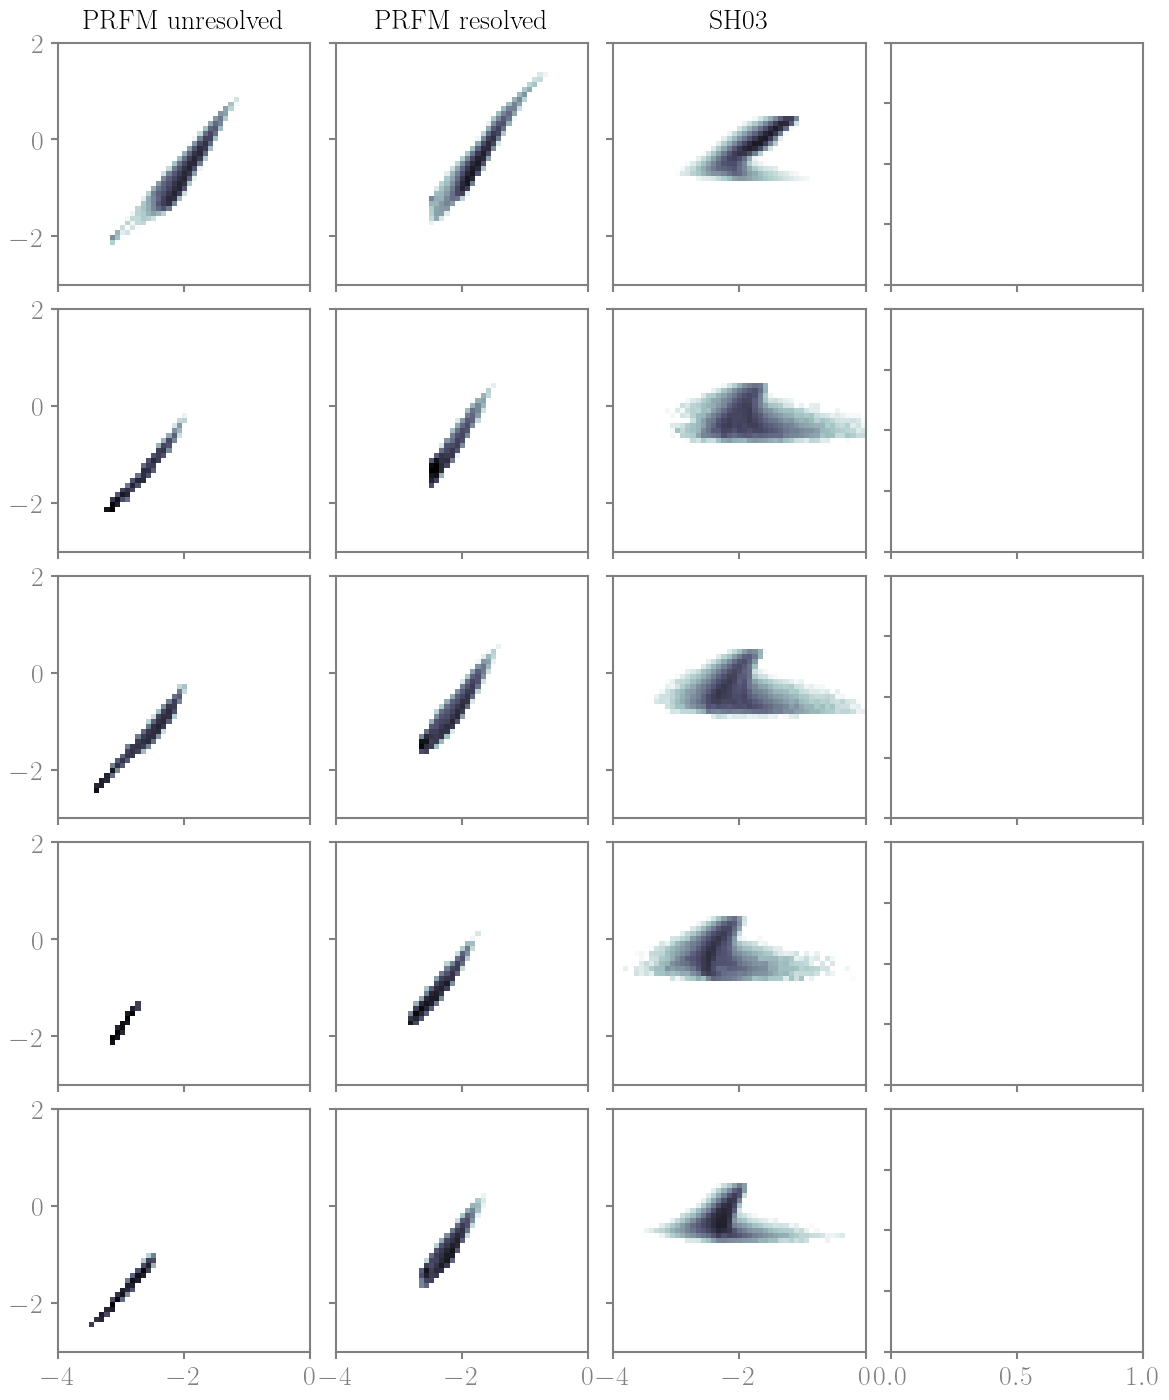

In [19]:
# 2D histogram of tau_dyn (x-axis) vs. tau_dep (y-axis) for PRFM and control (SH03) case,
# on two separate axes
fig, ax = plt.subplots(5, 4, figsize=(14, 17))

# PRFM unresolved
for i in range(5):
    tau_deps, tau_dyns, SFRs = tau_deps_prfm[i], tau_dyns_prfm[i], SFRs_prfm[i]
    frac_SFR, _, _, _ = binned_statistic_2d(
        np.log10(tau_dyns/ah.Gyr_to_s), np.log10(tau_deps/ah.Gyr_to_s),
        SFRs, statistic='sum',
        bins=(np.linspace(-4., 0., 50), np.linspace(-3., 2., 50))
    )
    frac_SFR /= np.sum(frac_SFR)
    ax[i,0].imshow(frac_SFR.T, origin='lower',
                     extent=(-4., 0., -3., 2.), aspect='auto',
                     cmap=plt.cm.bone_r, norm=LogNorm(vmin=1.e-4, vmax=1.e-1))
ax[0,0].set_title('PRFM unresolved', pad=10, fontsize=20)

# PRFM resolved
for i in range(5):
    tau_deps, tau_dyns, SFRs = tau_deps_prfm_res[i], tau_dyns_prfm_res[i], SFRs_prfm_res[i]
    frac_SFR, _, _, _ = binned_statistic_2d(
        np.log10(tau_dyns/ah.Gyr_to_s), np.log10(tau_deps/ah.Gyr_to_s),
        SFRs, statistic='sum',
        bins=(np.linspace(-4., 0., 50), np.linspace(-3., 2., 50))
    )
    frac_SFR /= np.sum(frac_SFR)
    ax[i,1].imshow(frac_SFR.T, origin='lower',
                     extent=(-4., 0., -3., 2.), aspect='auto',
                     cmap=plt.cm.bone_r, norm=LogNorm(vmin=1.e-4, vmax=1.e-1))
ax[0,1].set_title('PRFM resolved', pad=10, fontsize=20)

# SH03
for i in range(5):
    tau_deps, tau_dyns, SFRs = tau_deps_SH03[i], tau_dyns_SH03[i], SFRs_SH03[i]
    frac_SFR, _, _, _ = binned_statistic_2d(
        np.log10(tau_dyns/ah.Gyr_to_s), np.log10(tau_deps/ah.Gyr_to_s),
        SFRs, statistic='sum',
        bins=(np.linspace(-4., 0., 50), np.linspace(-3., 2., 50))
    )
    frac_SFR /= np.sum(frac_SFR)
    ax[i,2].imshow(frac_SFR.T, origin='lower',
                     extent=(-4., 0., -3., 2.), aspect='auto',
                     cmap=plt.cm.bone_r, norm=LogNorm(vmin=1.e-4, vmax=1.e-1))
ax[0,2].set_title('SH03', pad=10, fontsize=20)

# remove y-labels
for i in range(1, 4):
    for j in range(5):
        ax[j,i].set_yticklabels([])
# remove x-labels
for i in range(4):
    for j in range(4):
        ax[j,i].set_xticklabels([])

plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.show()